# Activity
### Note Ive included the explanations in comments. It should be in Markup  

In [1]:
import pandas as pd
import seaborn as sns
from numpy import median, mean

In [2]:
# read the dataset as a pandas dataframe
olympics_df = pd.read_csv('data/athlete_events.csv')

# preview dataframe
olympics_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# filter the dataframe to contain medal winners only (for non-winners, the Medal feature is NaN)
# note use of the inplace parameter
olympics_winners = olympics_df.dropna(subset=['Medal'])
olympics_winners.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [4]:
# print records for each value of the feature 'Sport'
olympics_winners_2016 = olympics_winners[(olympics_winners.Year == 2016)]
olympics_winners_2016.Sport.value_counts()


Athletics                192
Swimming                 191
Rowing                   144
Football                 106
Hockey                    99
Handball                  89
Cycling                   84
Canoeing                  82
Water Polo                78
Rugby Sevens              74
Wrestling                 72
Basketball                72
Volleyball                72
Gymnastics                66
Fencing                   65
Judo                      56
Boxing                    51
Equestrianism             45
Sailing                   45
Shooting                  45
Weightlifting             45
Diving                    36
Synchronized Swimming     32
Taekwondo                 32
Archery                   24
Table Tennis              24
Badminton                 24
Tennis                    24
Rhythmic Gymnastics       18
Beach Volleyball          12
Trampolining               6
Golf                       6
Triathlon                  6
Modern Pentathlon          6
Name: Sport, d

In [5]:
# list the top 5 sports
top_sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']

# subset the dataframe to include data from the top sports
olympics_top_sports_winners_2016 = olympics_winners_2016[(olympics_winners_2016.Sport.isin(top_sports))]
olympics_top_sports_winners_2016.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


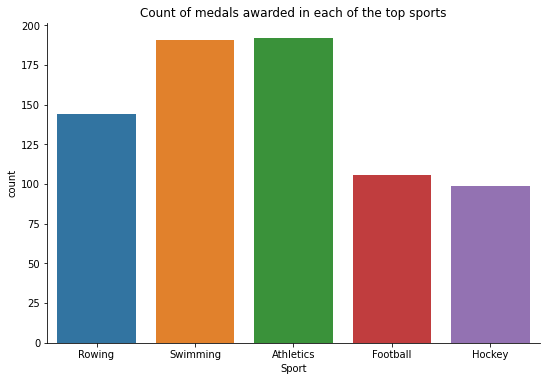

In [14]:
# generate bar plot indicating count of medals awarded in each of the top sports
g = sns.catplot('Sport', data=olympics_top_sports_winners_2016, kind="count", aspect=1.5);
g.set(title='Count of medals awarded in each of the top sports');


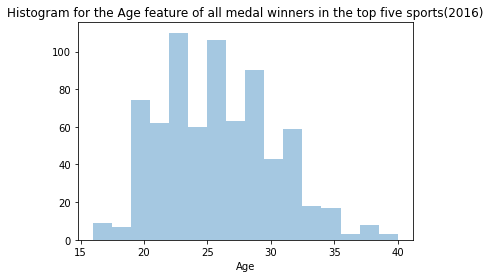

In [13]:
olwin2016=sns.distplot(olympics_top_sports_winners_2016.Age, kde=False);
olwin2016.set(title='Histogram for the Age feature of all medal winners in the top five sports(2016)');

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


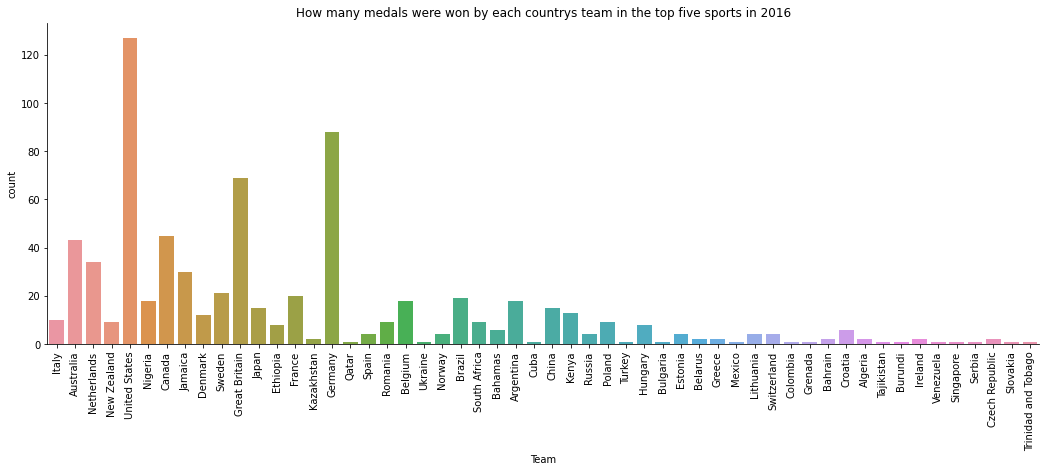

In [15]:
g = sns.catplot('Team', data=olympics_top_sports_winners_2016, kind="count", aspect=3);
g.set_xticklabels(rotation=90);
g.set(title='How many medals were won by each countrys team in the top five sports in 2016');

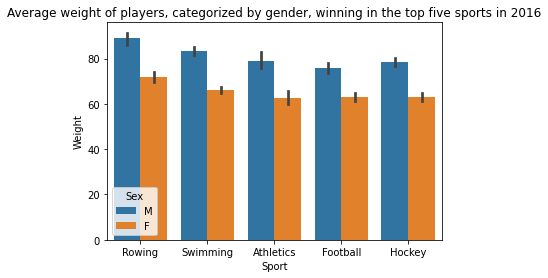

In [18]:
mf=sns.barplot(x="Sport", y="Weight", data=olympics_top_sports_winners_2016, estimator=mean, hue='Sex');
mf.set(title="Average weight of players, categorized by gender, winning in the top five sports in 2016");